In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pickle.load(open('dataset_level2.pkl','rb'))

In [3]:
df

# batting_team
# bowling team
# city
# current score
# ball left
# wickets left
# current rr
# last five

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


In [4]:
df.isnull().sum()

match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [5]:
df[df['city'].isnull()]['venue'].value_counts()

venue
Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: count, dtype: int64

In [6]:
# Filling missing values in the 'city' column
# If 'city' is NaN, use the first word of the 'venue' as a proxy city name
# Otherwise, keep the existing value in 'city'
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [7]:
df['city'] = cities

In [8]:
df.isnull().sum()

match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [9]:
df.drop(columns=['venue'],inplace=True)

In [10]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [11]:
# Create a list of cities that appear more than 600 times in the dataset
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [12]:
# Keep only the rows where the city is one of the eligible cities (appears more than 600 times)
df = df[df['city'].isin(eligible_cities)]

In [13]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne
...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo


In [14]:
# Ensure 'runs' column is numeric before cumulative sum
df['runs'] = pd.to_numeric(df['runs'], errors='coerce')

# Calculate the cumulative score (current_score) for each match using the 'runs' column
df['current_score'] = df.groupby('match_id')['runs'].cumsum()

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\2887214404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['runs'] = pd.to_numeric(df['runs'], errors='coerce')
C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\2887214404.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['current_score'] = df.groupby('match_id')['runs'].cumsum()


In [15]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3
...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127


In [16]:
# Extract the over number from the 'ball' column (before the decimal point)
df['over'] = df['ball'].apply(lambda x: str(x).split(".")[0])

# Extract the ball number within the over (after the decimal point)
df['ball_no'] = df['ball'].apply(lambda x: str(x).split(".")[1])
df

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\979106278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over'] = df['ball'].apply(lambda x: str(x).split(".")[0])
C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\979106278.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ball_no'] = df['ball'].apply(lambda x: str(x).split(".")[1])


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5
...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6


In [17]:
# Calculate the total number of balls bowled in the match till that point
# by converting over to balls (1 over = 6 balls) and adding the ball number
df['balls_bowled'] = (df['over'].astype('int') * 6) + df['ball_no'].astype('int')
df

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\1338619248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_bowled'] = (df['over'].astype('int') * 6) + df['ball_no'].astype('int')


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120


In [18]:
# Calculate how many balls are left in the innings (T20 = 120 balls)
df['balls_left'] = 120 - df['balls_bowled']
# Ensure balls_left doesn't go negative (set to 0 if less than 0)
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)
df

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\4029454481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = 120 - df['balls_bowled']
C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\4029454481.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,0,Colombo,125,19,3,117,3
115321,964,Sri Lanka,Australia,19.4,0,0,Colombo,125,19,4,118,2
115322,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,125,19,5,119,1
115323,964,Sri Lanka,Australia,19.6,2,0,Colombo,127,19,6,120,0


In [19]:
# Step 1: Convert 'player_dismissed' column to binary values: 0 = not dismissed, 1 = dismissed
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if str(x) == '0' else 1)

# Step 2: Force to numeric (int type)
df['player_dismissed'] = pd.to_numeric(df['player_dismissed'], errors='coerce').fillna(0).astype(int)

# Step 3: Apply cumulative sum per match_id group
df['player_dismissed'] = df.groupby('match_id')['player_dismissed'].cumsum()

# Step 4: Calculate wickets left
df['wickets_left'] = 10 - df['player_dismissed']
df

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\2819831514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if str(x) == '0' else 1)
C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\2819831514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['player_dismissed'] = pd.to_numeric(df['player_dismissed'], errors='coerce').fillna(0).astype(int)
C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\2819831514.py:8: SettingWithCopyWarning: 
A va

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1


In [20]:
df['crr'] = (df['current_score']*6)/df['balls_bowled']

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\914577034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['crr'] = (df['current_score']*6)/df['balls_bowled']


In [21]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000


In [22]:
# Group the DataFrame by 'match_id'
groups = df.groupby('match_id')

# Get a list of all unique match IDs
match_ids = df['match_id'].unique()

# Initialize an empty list to store rolling sums
last_five = []

# Loop through each match ID
for id in match_ids:
    # Get the 'runs' column for the current match
    match_runs = groups.get_group(id)['runs']
    
    # Calculate rolling sum with a window of 30 and extend the result to the list
    last_five.extend(match_runs.rolling(window=30).sum().values.tolist())


In [23]:
# Assign the calculated rolling sums to a new column 'last_five' in the original DataFrame
df['last_five'] = last_five

C:\Users\MAHAD\AppData\Local\Temp\ipykernel_3348\4128922607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_five'] = last_five


In [24]:
df

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,current_score,over,ball_no,balls_bowled,balls_left,wickets_left,crr,last_five
0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,0,0,1,1,119,10,0.000000,NaN
1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,0,0,2,2,118,10,0.000000,NaN
2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,1,0,3,3,117,10,2.000000,NaN
3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,3,0,4,4,116,10,4.500000,NaN
4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,3,0,5,5,115,10,3.600000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115320,964,Sri Lanka,Australia,19.3,1,8,Colombo,125,19,3,117,3,2,6.410256,32.0
115321,964,Sri Lanka,Australia,19.4,0,8,Colombo,125,19,4,118,2,2,6.355932,32.0
115322,964,Sri Lanka,Australia,19.5,0,9,Colombo,125,19,5,119,1,1,6.302521,32.0
115323,964,Sri Lanka,Australia,19.6,2,9,Colombo,127,19,6,120,0,1,6.350000,33.0


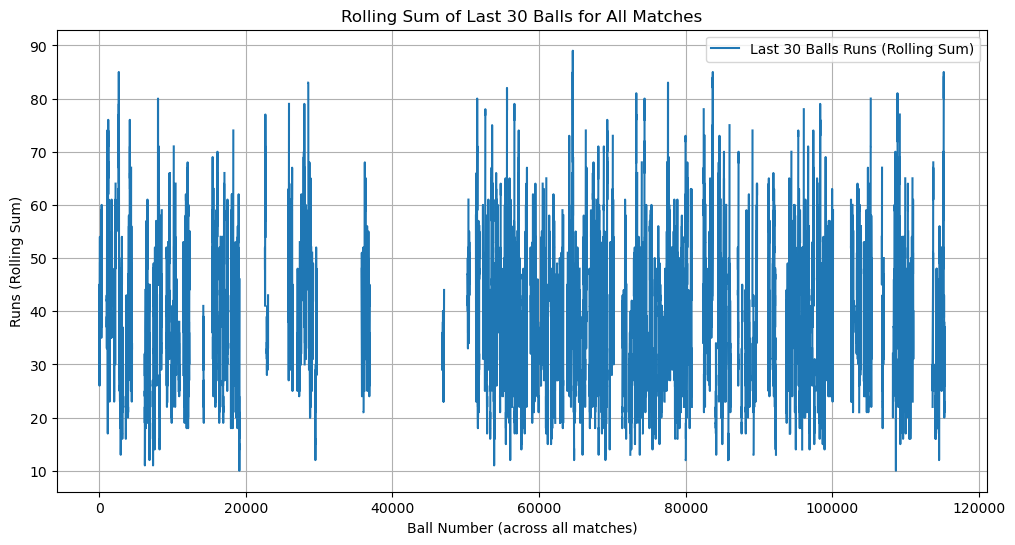

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(df['last_five'], label='Last 30 Balls Runs (Rolling Sum)')
plt.title('Rolling Sum of Last 30 Balls for All Matches')
plt.xlabel('Ball Number (across all matches)')
plt.ylabel('Runs (Rolling Sum)')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df,on='match_id')

In [27]:
final_df=final_df[['batting_team','bowling_team','city','current_score','balls_left','wickets_left','crr','last_five','runs_x']]

In [28]:
final_df.dropna(inplace=True)

In [29]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wickets_left     0
crr              0
last_five        0
runs_x           0
dtype: int64

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38477 entries, 29 to 50500
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   38477 non-null  object 
 1   bowling_team   38477 non-null  object 
 2   city           38477 non-null  object 
 3   current_score  38477 non-null  int64  
 4   balls_left     38477 non-null  int64  
 5   wickets_left   38477 non-null  int32  
 6   crr            38477 non-null  float64
 7   last_five      38477 non-null  float64
 8   runs_x         38477 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 2.8+ MB


In [31]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
29,Australia,Sri Lanka,Melbourne,43,90,10,8.600000,43.0,168
30,Australia,Sri Lanka,Melbourne,44,89,10,8.516129,44.0,168
31,Australia,Sri Lanka,Melbourne,45,88,10,8.437500,45.0,168
32,Australia,Sri Lanka,Melbourne,45,87,10,8.181818,44.0,168
33,Australia,Sri Lanka,Melbourne,45,86,10,7.941176,42.0,168
...,...,...,...,...,...,...,...,...,...
50496,Sri Lanka,Australia,Colombo,125,3,2,6.410256,32.0,128
50497,Sri Lanka,Australia,Colombo,125,2,2,6.355932,32.0,128
50498,Sri Lanka,Australia,Colombo,125,1,1,6.302521,32.0,128
50499,Sri Lanka,Australia,Colombo,127,0,1,6.350000,33.0,128


In [32]:
final_df = final_df.sample(final_df.shape[0])

In [33]:
final_df.sample(2)

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five,runs_x
42306,South Africa,West Indies,Durban,125,32,9,8.522727,31.0,195
5570,India,Sri Lanka,Colombo,117,32,7,7.977273,39.0,174


In [34]:
# Save the final engineered DataFrame to a .pkl file
with open('dataset_final.pkl', 'wb') as f:
    pickle.dump(final_df, f)

In [35]:
X = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
X_train

,batting_team,bowling_team,city,current_score,balls_left,wickets_left,crr,last_five
14385,Sri Lanka,England,Southampton,117,37,4,8.457831,35.0
45498,England,Pakistan,Manchester,78,59,7,7.672131,34.0
35931,New Zealand,England,Wellington,64,59,8,6.295082,40.0
25435,Australia,Sri Lanka,Barbados,132,15,5,7.542857,55.0
26158,Pakistan,Australia,St Lucia,110,39,8,8.148148,33.0
...,...,...,...,...,...,...,...,...
47151,Afghanistan,Sri Lanka,Kolkata,41,80,9,6.150000,35.0
24565,Pakistan,England,Barbados,122,13,3,6.841121,33.0
43905,New Zealand,South Africa,Centurion,114,40,6,8.550000,39.0
48181,India,Bangladesh,Bangalore,115,23,5,7.113402,42.0


In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [40]:
trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [41]:
# Creating a pipeline with preprocessing and model steps
pipe = Pipeline(steps=[
    # Step 1: Apply column transformer (includes OneHotEncoding for categorical features)
    ('step1', trf),
    
    # Step 2: Standardize the data using StandardScaler
    ('step2', StandardScaler()),
    
    # Step 3: Train the model using XGBoost Regressor with specified hyperparameters
    ('step3', XGBRegressor(n_estimators=1000, learning_rate=0.2, max_depth=12, random_state=1))
])


In [42]:
pipe.fit(X_train,y_train)

C:\Users\MAHAD\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=12, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [43]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [44]:
y_pred = pipe.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("R² Score     :", r2*100)
print("MAE          :", mae)
print("MSE          :", mse)
print("RMSE         :", rmse)

R² Score     : 98.76468777656555
MAE          : 1.6784194467469213
MSE          : 12.86748458169756
RMSE         : 3.5871276227223308


In [45]:
pipe.score(X_test,y_test)*100

98.76468777656555

In [46]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [52]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']